In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data=pd.read_csv('/content/WELFake_Dataset.csv')

In [9]:
print(data.shape)

(72134, 4)


In [10]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
print(data.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [12]:
data=data.fillna(' ')

In [13]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Load the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
# Preprocessing Functions
def preprocess_text(text):
    """Lowercase and remove non-essential characters."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Keep only alphanumeric and spaces
    return text

In [18]:
def tokenize_and_remove_stopwords(text):
    """Tokenize and remove stopwords."""
    sentences = sent_tokenize(text)
    tokens = [word_tokenize(sentence) for sentence in sentences]
    filtered_tokens = [[word for word in token_list if word not in stop_words] for token_list in tokens]
    return filtered_tokens

In [19]:
def regex_filter(text):
    """Remove numbers, URLs, emails, and phone numbers."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '', text)  # Remove phone numbers
    return text

In [20]:
import re
def fin(text):
  text=  re.sub(r'[^\w\s]', ' ',text)
  text = re.sub(r'[ \n]+', ' ', text)
  return text

In [21]:
def lemmatize_text(tokens):
    """Lemmatize tokens."""
    lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in token_list] for token_list in tokens]
    return lemmatized_tokens

In [22]:
def full_preprocess_pipeline(text):
    """Complete preprocessing pipeline for a single text."""
    text = preprocess_text(text)  # Lowercase and remove non-essential characters
    text = regex_filter(text)  # Remove numbers, URLs, emails, phone numbers
    text = fin(text)  # Remove special characters and unwanted spaces
    tokens = tokenize_and_remove_stopwords(text)  # Tokenize and remove stopwords
    lemmatized_tokens = lemmatize_text(tokens)  # Lemmatize the tokens
    cleaned_text = ' '.join([' '.join(sentence) for sentence in lemmatized_words])
    return cleaned_text

In [23]:
# # Load DataFrame (Example: replace 'your_data.csv' with your actual file)
# df = pd.read_csv('your_data.csv')

# Apply preprocessing to the 'title' and 'text' columns
# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)
data['cleaned_title'] = data['title'].apply(preprocess_text)

# Optionally, drop the 'Unnamed: 0' column if it's not needed
data = data.drop(columns=['Unnamed: 0'])

# Show the processed dataframe
print(data.head())

# Save the processed dataframe to a new CSV file
data.to_csv('processed_data.csv', index=False)

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  no comment is expected from barack obama membe...   
1      did they post their votes for hillary already   
2   now most of the demonstrators gathered last n...   
3  a dozen politically active pastors came here f...   
4  t

In [24]:
processed_data=pd.read_csv('/content/processed_data.csv')

In [25]:
print(processed_data.head())

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  no comment is expected from barack obama membe...   
1      did they post their votes for hillary already   
2   now most of the demonstrators gathered last n...   
3  a dozen politically active pastors came here f...   
4  t

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load your dataset (assuming it has 'text' column)
# df = pd.read_csv('your_data.csv')

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(processed_data, test_size=0.2, random_state=42)

# Save the text column from train and test sets to separate text files
train_df['cleaned_text'].to_csv('train_unsupervised.txt', index=False, header=False)
test_df['cleaned_text'].to_csv('test_unsupervised.txt', index=False, header=False)


In [27]:
test=pd.read_csv('/content/test_unsupervised.txt')
train=pd.read_csv('/content/train_unsupervised.txt')

In [28]:
print(train.head())
print("........")
print(test.head())

  although tesla ceo elon musk shocked silicon valley by breaking ranks to become an official member of the white house manufacturing jobs initiative the value of his tesla stock is up by over 2 billion since the election of donald trump as president after a dizzying week of executive orders covering obamacare trade and immigration president trump held an approval rating of 55 percent of likely voters according to the rasmussen reports daily presidential tracking poll that is only slightly below the 59 percent level of president obama when he left office  voters welcomed president trumps decision to scrap the   partnership tpp   deal and agree that the north american free trade agreement nafta with mexico and canada needs to be reworked although supporters argue free trade makes products cheaper for u s consumers americans believe     by a whopping 73 percent to 16 percent margin      it is more important to keep manufacturing jobs in the united states than keep prices low for u s cons

In [29]:
!pip install fasttext

In [30]:
import fasttext

# # Step 2: Train FastText in unsupervised mode on your training data
# # You can adjust parameters like dim (embedding size), minCount (minimum word count), and epoch (number of iterations)
# unsupervised_model = fasttext.train_unsupervised(input='train_unsupervised.txt', model='cbow', dim=100, epoch=5)

# # Save the trained model
# unsupervised_model.save_model('unsupervised_fasttext_model.bin')
ft_model = fasttext.load_model('unsupervised_fasttext_model.bin')

In [32]:
import numpy as np

# Step 3: Function to create FastText embeddings for each text
def text_to_fasttext_embeddings(text, ft_model):
    words = text.split()
    embeddings = []

    # Get the vector for each word in the text and append it to the list
    for word in words:
        vector = ft_model.get_word_vector(word)
        embeddings.append(vector)

    # Return the mean of all word vectors or a zero vector if no valid words are found
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(ft_model.get_dimension())

# Step 4: Generate embeddings for the training and testing sets
X_train_fasttext = np.vstack(train_df['text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model)))
X_test_fasttext = np.vstack(test_df['text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model)))

# Save the embeddings for future use
np.save('train_unsupervised_fasttext_embeddings.npy', X_train_fasttext)
np.save('test_unsupervised_fasttext_embeddings.npy', X_test_fasttext)

# Now X_train_fasttext and X_test_fasttext contain the FastText embeddings for each text in your train and test sets


In [39]:
from tensorflow.keras.utils import to_categorical


X_train_reshaped = X_train_fasttext.reshape((X_train_fasttext.shape[0], X_train_fasttext.shape[1], 1))
X_test_reshaped = X_test_fasttext.reshape((X_test_fasttext.shape[0], X_test_fasttext.shape[1], 1))

# Assuming binary classification (for multi-class adjust num_classes)
y_train_encoded = to_categorical(train_df['label'], num_classes=2)
y_test_encoded = to_categorical(test_df['label'], num_classes=2)


In [49]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))


y_pred_rf = rf_model.predict(X_test_fasttext)

accuracy_rf = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9251403618215845


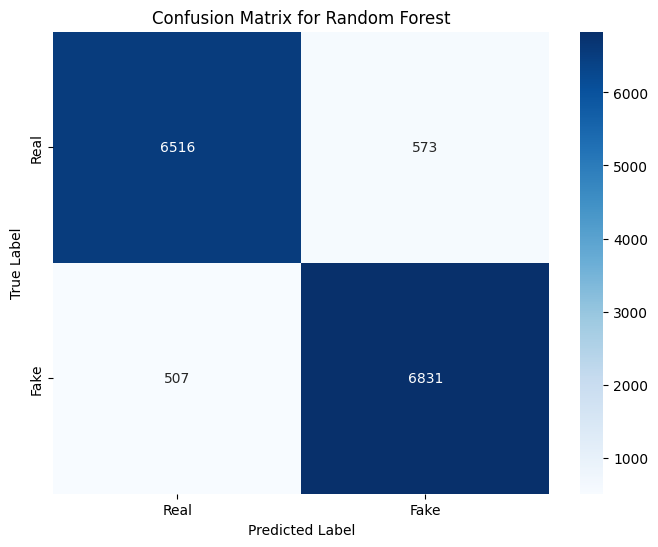

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'rbf', 'poly')

svm_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

y_pred_svm = svm_model.predict(X_test_fasttext)

accuracy_svm = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9015041242115478


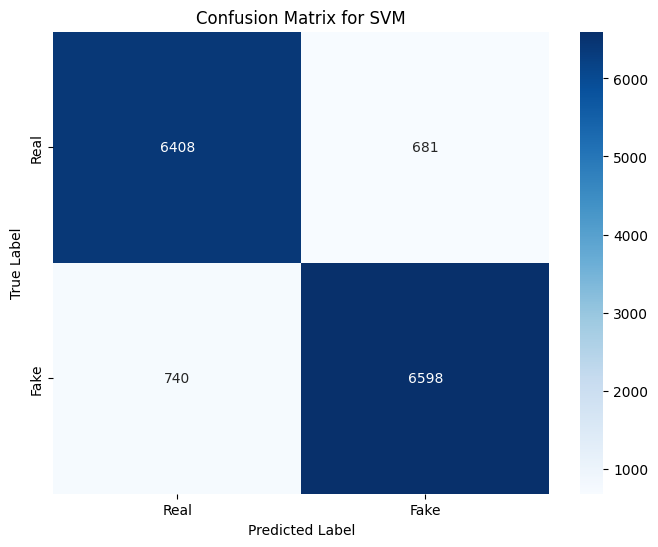

In [37]:
cm_svm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

Decision Tree Accuracy: 0.8637277327233659


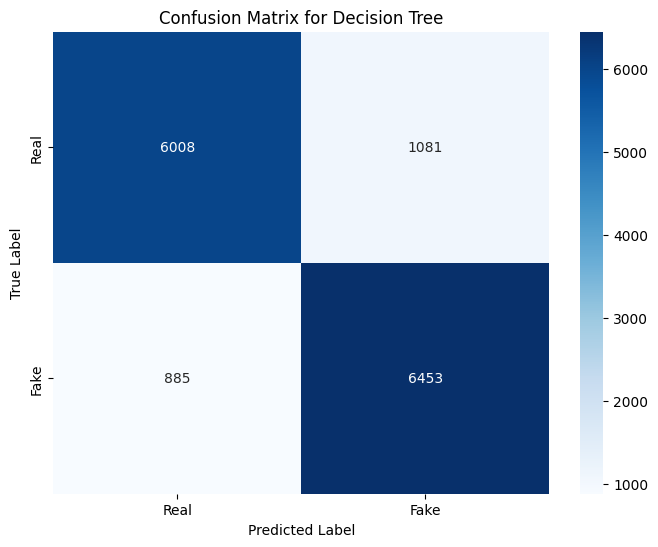

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

y_pred_dt = dt_model.predict(X_test_fasttext)

accuracy_dt = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


cm_dt = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_dt)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Use GridSearchCV to find the best regularization parameter (C)
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))


print("Best C:", grid_search.best_params_['C'])


best_logistic_model = LogisticRegression(C=grid_search.best_params_['C'], max_iter=1000)
best_logistic_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))


y_pred_logistic = best_logistic_model.predict(X_test_fasttext)
accuracy_logistic = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)
print(f"Logistic Regression Accuracy (with Regularization): {accuracy_logistic}")


Best C: 100
Logistic Regression Accuracy (with Regularization): 0.9008802938933943


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score



precision_rf = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)
recall_rf = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)
f1_rf = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)

print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")



precision_svm = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)
recall_svm = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)
f1_svm = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)

print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-score: {f1_svm}")


precision_dt = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)
recall_dt = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)
f1_dt = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)

print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1-score: {f1_dt}")



precision_logistic = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)
recall_logistic = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)
f1_logistic = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)

print(f"Logistic Regression Precision: {precision_logistic}")
print(f"Logistic Regression Recall: {recall_logistic}")
print(f"Logistic Regression F1-score: {f1_logistic}")

Random Forest Precision: 0.9226094003241491
Random Forest Recall: 0.9309076042518397
Random Forest F1-score: 0.9267399267399268
SVM Precision: 0.9064431927462564
SVM Recall: 0.899155083128918
SVM F1-score: 0.9027844290894165
Decision Tree Precision: 0.8565171223785506
Decision Tree Recall: 0.8793949304987735
Decision Tree F1-score: 0.8678052716514255
Logistic Regression Precision: 0.9039934354485777
Logistic Regression Recall: 0.9007904061052058
Logistic Regression F1-score: 0.9023890784982935


Ensemble Model Accuracy: 0.9091980314687739
Ensemble Model Precision: 0.9349206349206349
Ensemble Model Recall: 0.8829381302807304
Ensemble Model F1-score: 0.9081861508270255


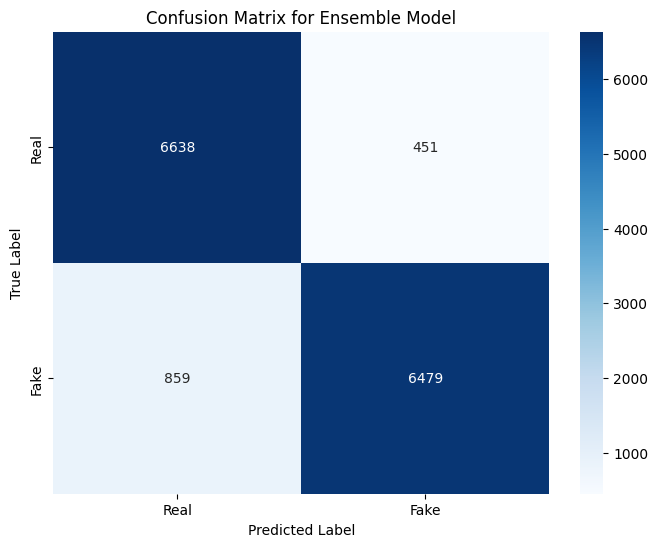

In [53]:
from sklearn.ensemble import VotingClassifier


ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('dt', dt_model),
    ('logistic', best_logistic_model)
], voting='hard')

ensemble_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

y_pred_ensemble = ensemble_model.predict(X_test_fasttext)

accuracy_ensemble = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")


precision_ensemble = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)
recall_ensemble = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)
f1_ensemble = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)

print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")

cm_ensemble = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()